# 1. Message Types


In [1]:
!pip install langgraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 13.8 MB/s eta 0:00:00


In [16]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage, SystemMessage

messages = [AIMessage(content='so you are researching about history', name = 'Model')]
messages.extend([HumanMessage(content='yes', name = 'Human')])
messages.extend([AIMessage(content='greate, what you want to learn', name = 'Model')])
# messages.extend([HumanMessage(content='best place to start',name = 'Human')])

for m in messages:
  m.pretty_print()

================================== Ai Message ==================================
Name: Model

so you are researching about history
================================ Human Message =================================
Name: Human

yes
================================== Ai Message ==================================
Name: Model

greate, what you want to learn


In [6]:
!pip install langchain_openai


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.1/438.1 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.0/363.0 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.44
    Uninstalling langsmith-0.3.44:
      Successfully uninstalled langsmith-0.3.44
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.63
    Uninstalling langchain-core-0.3.63:
      Successfully uninstalled langchain-core-0.3.63


In [13]:
import os, getpass
def _set_env(var:str):
  if not os.environ.get(var):
    os.environ[var]=getpass.getpass(f'Enter {var}:')

_set_env('OPENAI_API_KEY')

Enter OPENAI_API_KEY:··········


In [17]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name = 'gpt-3.5-turbo', temperature = 0)
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [18]:
result

AIMessage(content='about history?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 3, 'prompt_tokens': 36, 'total_tokens': 39, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-Bgx9185BC1SrEhUaO1jCYArfAU2Tx', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--3c722c7e-f7ec-473c-9425-922f19e64729-0', usage_metadata={'input_tokens': 36, 'output_tokens': 3, 'total_tokens': 39, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [19]:
messages = [AIMessage(content='so you are researching about history', name = 'Model')]
messages.extend([HumanMessage(content='yes', name = 'Human')])
messages.extend([AIMessage(content='greate, what you want to learn', name = 'Model')])
messages.extend([HumanMessage(content='best place to start',name = 'Human')])

In [20]:
result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [21]:
result

AIMessage(content="A good place to start when researching history is to identify a specific time period, region, or topic that interests you. Once you have a focus, you can begin by exploring general overviews, textbooks, and online resources to gain a broad understanding of the subject. From there, you can delve deeper into more specialized sources such as academic journals, primary documents, and historical archives to further your research. It's also helpful to consult with historians, professors, or experts in the field to gain insights and guidance on your research journey.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 106, 'prompt_tokens': 46, 'total_tokens': 152, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'i

# 2. Tools

In [30]:
def multiply(a: int, b:int)->int :
  '''
     multiply a and b.

     Args:
        a: first int
        b: second int
  '''
  return a*b

def polygon(a: int, b:int)->int :
  '''
     returns the poligon of two int numbers a and b. this should run only when asked for polygon value.

     Args:
        a: first int
        b: second int
  '''
  return (a*b)*(a+b)+1

llm_with_tools = llm.bind_tools([multiply,polygon])

In [33]:
tool_call = llm_with_tools.invoke([HumanMessage(content='what is 3 times 4  ')])
tool_call.additional_kwargs

{'tool_calls': [{'id': 'call_tkrulYf2R4aLFVVUOEwVdD1D',
   'function': {'arguments': '{"a":3,"b":4}', 'name': 'multiply'},
   'type': 'function'}],
 'refusal': None}

Messages State

In [35]:
# usign reduces

from typing_extensions import TypedDict
from typing import Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

class MessageState(TypedDict):
  messages: Annotated[list[AnyMessage],add_messages]

#But langgraph have pre built MessageState

In [36]:
from langgraph.graph import MessagesState

class State(MessagesState):
  # add any keys needed beyond messages, witch is pre built
  pass

In [39]:
initial_messages = [AIMessage(content='so you are researching about history', name = 'Model'), HumanMessage(content='yes', name = 'Human')]
new_message = AIMessage(content='great', name = 'Model')
add_messages(initial_messages, new_message)

[AIMessage(content='so you are researching about history', additional_kwargs={}, response_metadata={}, name='Model', id='9957c97d-5a15-4407-af60-7b6af9b676cf'),
 HumanMessage(content='yes', additional_kwargs={}, response_metadata={}, name='Human', id='3da4e2b9-ff26-442d-854a-839797f85ca2'),
 AIMessage(content='great', additional_kwargs={}, response_metadata={}, name='Model', id='86d15433-326d-437e-b699-725a2260f07e')]

In [40]:
initial_messages

[AIMessage(content='so you are researching about history', additional_kwargs={}, response_metadata={}, name='Model', id='9957c97d-5a15-4407-af60-7b6af9b676cf'),
 HumanMessage(content='yes', additional_kwargs={}, response_metadata={}, name='Human', id='3da4e2b9-ff26-442d-854a-839797f85ca2')]

# Graph

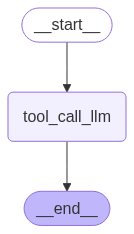

In [42]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

class MessagesState(MessagesState):
  #additional keys
  pass

#node
def tool_call_llm(state: MessagesState):
  return {"messages": [llm_with_tools.invoke(state['messages'])]}

#build graph
builder = StateGraph(MessagesState)
builder.add_node('tool_call_llm',tool_call_llm)
builder.add_edge(START, 'tool_call_llm')
builder.add_edge('tool_call_llm', END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [43]:
messages = graph.invoke({"messages":HumanMessage(content='Hello')})
messages

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='9d9dafcf-82ef-4325-9bd4-d40485e85686'),
  AIMessage(content='Hi! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 105, 'total_tokens': 115, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BgypvRkdAWedZ3VY6mpKy8HEkCDae', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--250b5dec-1bc7-48cb-bf36-14bde712f313-0', usage_metadata={'input_tokens': 105, 'output_tokens': 10, 'total_tokens': 115, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}

In [44]:
messages = graph.invoke({"messages":HumanMessage(content='what is 2 * 6')})
messages

{'messages': [HumanMessage(content='what is 2 * 6', additional_kwargs={}, response_metadata={}, id='4b492737-cd9c-4430-8b5c-cb172b0f760f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_cr9PxFB6KQE8icsQFmq9RYxm', 'function': {'arguments': '{"a":2,"b":6}', 'name': 'multiply'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 111, 'total_tokens': 128, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BgyqouNJBHQCzUNtZncdmlaSPBqNn', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--118890f9-3d1e-41b3-9061-a478916b2243-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 6}, 'id': 'call_cr9PxFB6KQE8icsQFmq9RYxm', 'type': 'too

In [ ]:
#NOTE - LLM decide witch tool to call, it does not call and get result by itself